# Notebook Explanation

In this notebook, we will create an Anime Recommender without Machine Learning! But firstly, we will need to explore and prepare the dataset. Afterwards, we will use the corrwith() function to find the correlation between the animes.


# _Imports and Opening Datasets_


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
animes_path = "../data/AnimeList.csv"
users_path = "../data/UserList.csv"
reviews_path = "../data/UserAnimeList.parquet"


In [31]:
animes_df = pd.read_csv(animes_path)
users_df = pd.read_csv(users_path)
reviews_df = pd.read_parquet(reviews_path, columns=["username", "anime_id", "my_score"])


# Animes_df Data Exploration and Preparation


In [32]:
animes_df.head()


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [33]:
animes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [34]:
# List of Columns in animes_df
print(animes_df.columns.to_list())


['anime_id', 'title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme']


In [35]:
## How Many animes are in the table
print(
    f"The dataset is composed of {animes_df.anime_id.count()} different anime series."
)


The dataset is composed of 14478 different anime series.


In [36]:
# we only want Anime Series, not movies or OVAs
animes_df.type.unique()


array(['TV', 'Movie', 'Music', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

In [37]:
def bar_episodes_graph(dataframe):
    plt.title("Number of Animes per number of episodes")
    plt.xlabel("Number of Episodes")
    plt.ylabel("Number of Animes")
    return dataframe.episodes.value_counts().head(15).plot.bar(figsize=(10, 7))


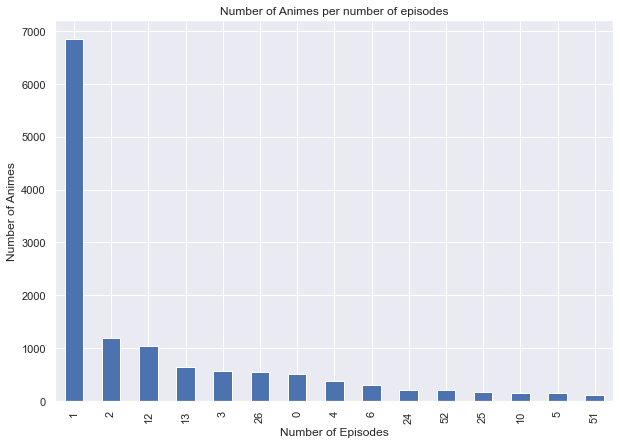

In [38]:
bar_episodes_graph(animes_df)


In [39]:
animes_df = animes_df[animes_df.type == "TV"]


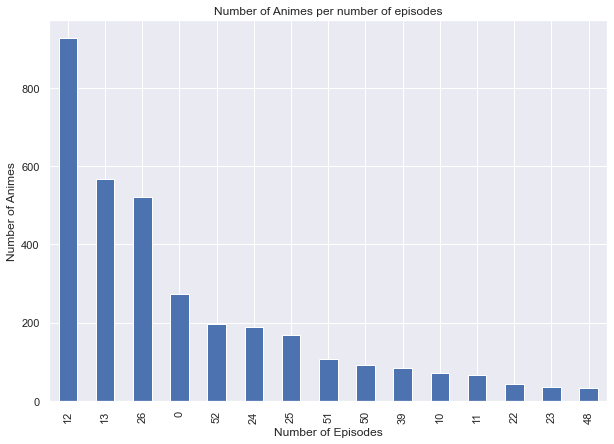

In [40]:
bar_episodes_graph(animes_df)


In [41]:
# includes the ones that still haven't aired and the ones airing
animes_df[animes_df.episodes == 0].head()


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
31,966,Crayon Shin-chan,Shin Chan,クレヨンしんちゃん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,The first English dubbed version was produced ...,Spring 1992,Fridays at 19:30 (JST),"{'Adaptation': [{'mal_id': 2435, 'type': 'mang...",TV Asahi,Funimation,Shin-Ei Animation,"Slice of Life, Comedy, Ecchi, School, Seinen","['#01: ""Doubutsuen wa Taihen da"" by Tune&#039;...","['#01: ""Uta wo Utaou"" by Daiji-Man Brothers Ba..."
34,21,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
67,33398,Neko Konogoro,NaN,ネコこのゴロ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,...,NaN,Summer 2016,Not scheduled once per week,[],NaN,NaN,Kachidoki Studio,Comedy,[],[]
145,37435,Carol & Tuesday,NaN,キャロル&チューズデイ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Spring 2019,Unknown,[],flying DOG,NaN,Bones,"Drama, Music, Romance",[],[]
334,35503,Shoujo☆Kageki Revue Starlight,NaN,少女☆歌劇 レヴュー・スタァライト,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Summer 2018,Fridays at 01:28 (JST),[],Bushiroad,NaN,Kinema Citrus,"Music, School","['""Hoshi no Dialogue (星のダイアローグ)"" by Starlight ...",[]


In [42]:
animes_df.status.unique()


array(['Finished Airing', 'Currently Airing', 'Not yet aired'],
      dtype=object)

In [43]:
# we only want animes that Finished Airing or are currently airing for our suggestions
animes_df = animes_df[animes_df.status != "Not yet aired"]
animes_df.status.unique()


array(['Finished Airing', 'Currently Airing'], dtype=object)

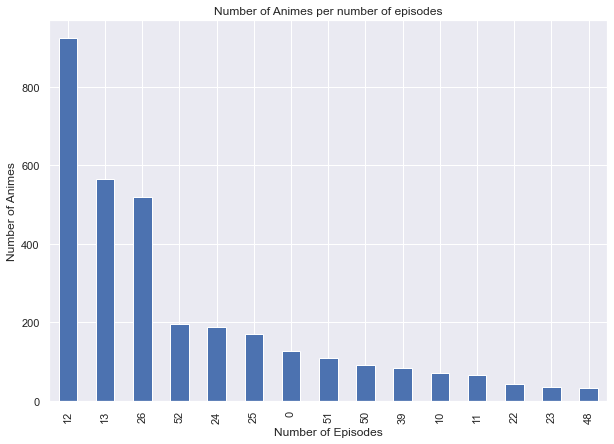

In [44]:
bar_episodes_graph(animes_df)


In [45]:
# get all the categories
categories_list = [
    element
    for element in animes_df.genre.unique().tolist()
    if "," not in str(element) and element == element
]

print(categories_list)


['Comedy', 'Sci-Fi', 'Slice of Life', 'Game', 'Ecchi', 'Kids', 'Sports', 'Action', 'Music', 'Fantasy', 'Adventure', 'Horror', 'Historical', 'Magic', 'Mystery', 'School', 'Drama', 'Mecha', 'Supernatural']


In [46]:
category_dic = {}
for category in categories_list:
    category_dic[category] = int(animes_df.genre.str.count(category).sum())
categories_df = pd.DataFrame(category_dic.items(), columns=["category", "count"])
categories_df


,category,count
0,Comedy,2029
1,Sci-Fi,828
2,Slice of Life,663
3,Game,144
4,Ecchi,273
5,Kids,578
6,Sports,259
7,Action,1187
8,Music,140
9,Fantasy,838


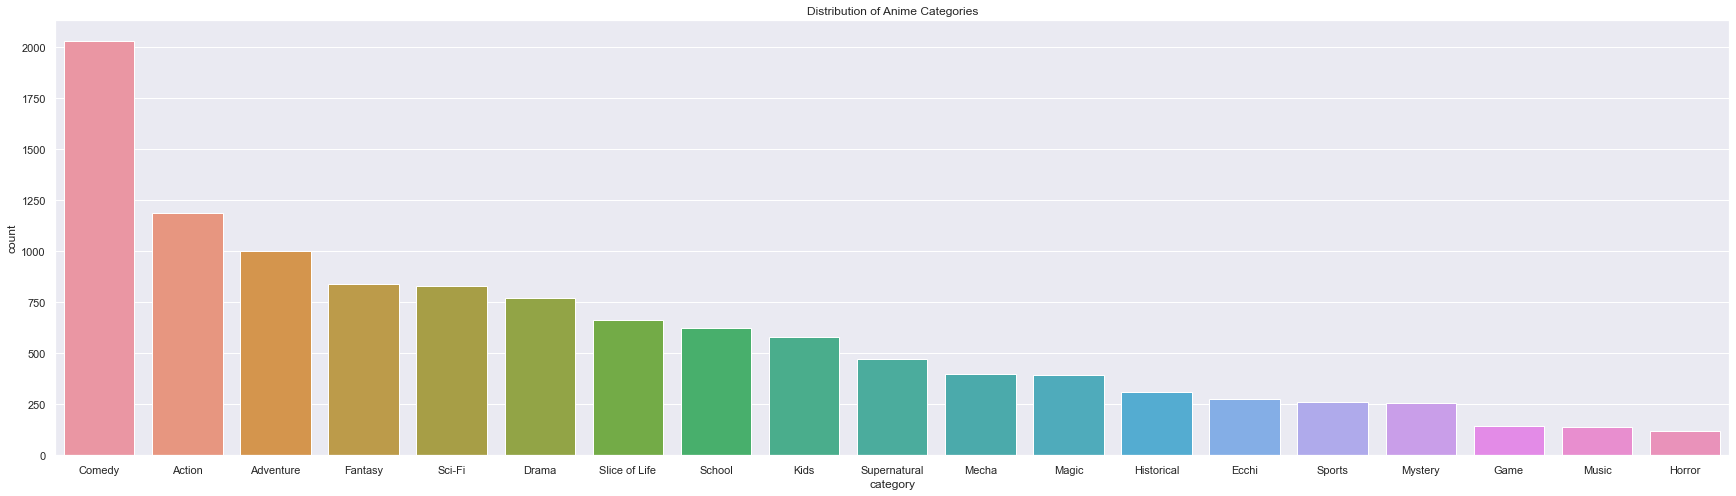

In [47]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(30, 8))
plt.title("Distribution of Anime Categories")
ax = sns.barplot(
    x="category", y="count", data=categories_df.sort_values(by="count", ascending=False)
)


# Stopping One Hot enconding Genres


In [48]:
print(
    f"The dataset is composed of {animes_df.anime_id.count()} different anime series after the data cleaning and preparation."
)


The dataset is composed of 4121 different anime series after the data cleaning and preparation.


In [49]:
animes_ratings_df = (
    animes_df[["anime_id", "title", "members", "score"]]
    .sort_values(by=["score", "members"], ascending=False)
    .drop_duplicates("anime_id")
)

animes_ratings_df.head(10)


,anime_id,title,members,score
2555,5114,Fullmetal Alchemist: Brotherhood,1199091,9.25
6177,30484,Steins;Gate 0,223989,9.15
1252,28977,Gintama°,198744,9.15
2999,9253,Steins;Gate,1010330,9.14
418,11061,Hunter x Hunter (2011),720920,9.11
8992,9969,Gintama&#039;,215527,9.11
1307,35180,3-gatsu no Lion 2nd Season,85744,9.10
5783,15417,Gintama&#039;: Enchousen,123572,9.07
6615,35247,Owarimonogatari 2nd Season,113928,9.02
10879,34096,Gintama.,91695,9.02


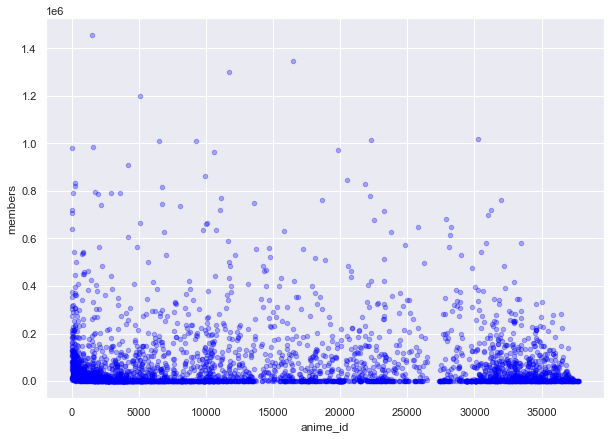

In [50]:
animes_ratings_df.plot.scatter(
    x="anime_id", y="members", color="blue", alpha=0.3, figsize=(10, 7)
)


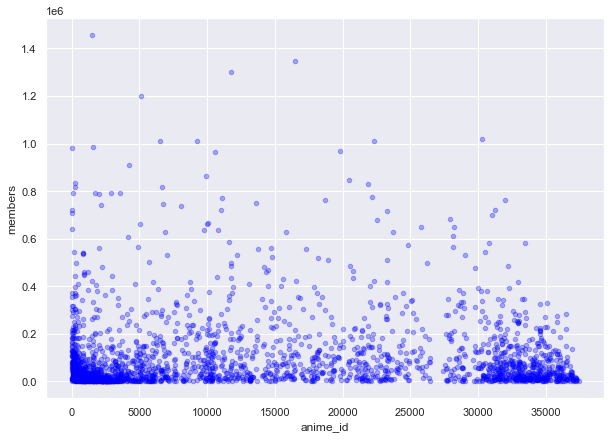

In [51]:
animes_ratings_df[animes_ratings_df["members"] > 2000].plot.scatter(
    x="anime_id", y="members", color="blue", alpha=0.3, figsize=(10, 7)
)


# Users_df Data Exploration and Preparation


In [52]:
users_df.head()


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0


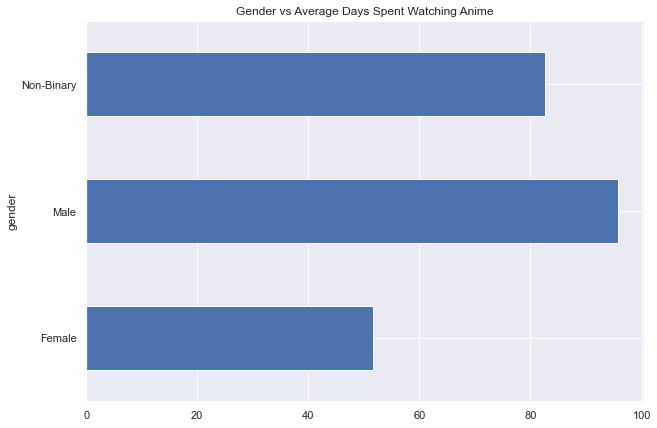

In [53]:
users_df.groupby("gender").user_days_spent_watching.mean().plot.barh(
    title="Gender vs Average Days Spent Watching Anime", figsize=(10, 7)
)


In [54]:
users_df.gender.value_counts()


Male          135181
Female         81374
Non-Binary      1245
Name: gender, dtype: int64

In [55]:
print(f"Mean Days Spent Watching Anime:", users_df.user_days_spent_watching.mean())
print(f"Median Days Spent Watching Anime:", users_df.user_days_spent_watching.median())


Mean Days Spent Watching Anime: 69.07645104485009
Median Days Spent Watching Anime: 39.58


In [56]:
print(f"Mean of Animes watched per User:", users_df.user_completed.mean())


Mean of Animes watched per User: 166.63828859337573


In [57]:
users_df.groupby("gender").stats_mean_score.mean()


gender
Female        7.439718
Male          7.448905
Non-Binary    7.221133
Name: stats_mean_score, dtype: float64

# Reviews_df Exploration & Preparation


In [58]:
reviews_df = reviews_df.sample(frac=1).head(10000000)
reviews_df.head()


,username,anime_id,my_score
69484331,lynnea,28297,8
1049659,wow1076,385,0
53192085,Kyunikeon,16001,8
10879955,DreamehDayo,12783,0
63526519,dc22,4094,0


In [59]:
all_df = pd.merge(
    reviews_df, animes_df[["anime_id", "title"]], how="left", on="anime_id"
)
all_df.head()


,username,anime_id,my_score,title
0,lynnea,28297,8,Ore Monogatari!!
1,wow1076,385,0,Gilgamesh
2,Kyunikeon,16001,8,NaN
3,DreamehDayo,12783,0,NaN
4,dc22,4094,0,NaN


In [60]:
count_series = all_df["title"].value_counts()

all_df = all_df[all_df.title.isin(count_series[count_series > 2000].index)]
all_df.head()


,username,anime_id,my_score,title
0,lynnea,28297,8,Ore Monogatari!!
5,DevoidBox,59,6,Chobits
6,Nyamo-sama,17247,0,Machine-Doll wa Kizutsukanai
7,felrock,19163,0,Date A Live II
11,Adrianooo,9041,9,IS: Infinite Stratos


In [63]:
all_df.title.value_counts()


Death Note                                       24591
Code Geass: Hangyaku no Lelouch                  20752
Shingeki no Kyojin                               19679
Toradora!                                        19665
Sword Art Online                                 19651
                                                 ...  
Le Chevalier D&#039;Eon                           2006
World Destruction: Sekai Bokumetsu no Rokunin     2006
Blue Gender                                       2006
Peace Maker Kurogane                              2004
Schwarzesmarken                                   2003
Name: title, Length: 1061, dtype: int64